<a href="https://colab.research.google.com/github/FelipyPenhaBotega/MVP_qualidade_vinho/blob/main/MVP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import joblib
from sklearn.model_selection import GridSearchCV
import pickle

In [ ]:
#Carga dos dados

# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/FelipyPenhaBotega/MVP_qualidade_vinho/main/dataset/winequalityN.csv"

# Lê o arquivo
wine_data = pd.read_csv(url)

# Mostra as primeiras linhas do dataset
wine_data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


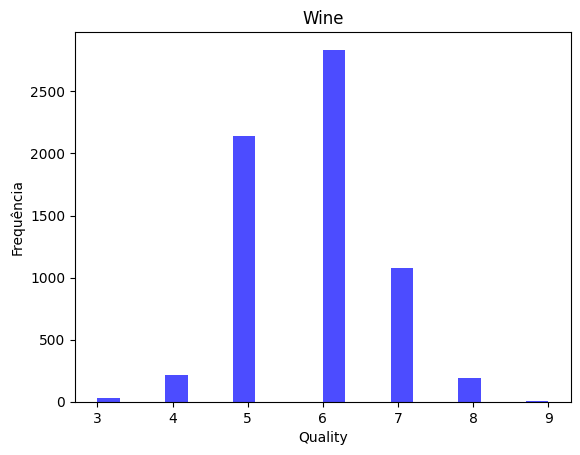

In [ ]:
# Exploração dos Dados
wine_data.info()
wine_data.describe()
wine_data.isnull().sum()
plt.hist(wine_data['quality'], bins=20, color='blue', alpha=0.7)
plt.title('Wine')
plt.xlabel('Quality')
plt.ylabel('Frequência')
plt.show()

In [ ]:
# Divisão entre Treino e Teste
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Normalização e Padronização após a divisão
numeric_features = X.select_dtypes(include=['float64']).columns
categorical_features = ['type']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [ ]:
# Modelagem e Pipelines
knn_model = Pipeline([('preprocessor', preprocessor), ('knn', KNeighborsClassifier())])
tree_model = Pipeline([('preprocessor', preprocessor), ('tree', DecisionTreeClassifier())])
nb_model = Pipeline([('preprocessor', preprocessor), ('nb', GaussianNB())])
svm_model = Pipeline([('preprocessor', preprocessor), ('svm', SVC())])


In [ ]:
# Otimização de Hiperparâmetros para KNN
param_grid_knn = {'knn__n_neighbors': [3, 5, 7, 9]}
grid_search_knn = GridSearchCV(knn_model, param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)
print("Melhores Parâmetros KNN:", grid_search_knn.best_params_)


Melhores Parâmetros KNN: {'knn__n_neighbors': 9}


In [ ]:
# Otimização de Hiperparâmetros para Decision Tree
param_grid_tree = {'tree__max_depth': [None, 10, 20, 30]}
grid_search_tree = GridSearchCV(tree_model, param_grid_tree, cv=5, scoring='accuracy')
grid_search_tree.fit(X_train, y_train)
print("Melhores Parâmetros Decision Tree:", grid_search_tree.best_params_)


Melhores Parâmetros Decision Tree: {'tree__max_depth': 30}


In [ ]:
# Otimização de Hiperparâmetros para SVM
param_grid_svm = {'svm__C': [1, 10], 'svm__gamma': [0.001, 0.01]}
grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)
print("Melhores Parâmetros SVM:", grid_search_svm.best_params_)


Melhores Parâmetros SVM: {'svm__C': 10, 'svm__gamma': 0.01}


In [ ]:
# Treinamento dos Modelos
best_knn_model = grid_search_knn.best_estimator_
best_tree_model = grid_search_tree.best_estimator_
best_svm_model = grid_search_svm.best_estimator_

In [ ]:
# Avaliação dos Modelos
models = {'KNN': best_knn_model, 'Decision Tree': best_tree_model, 'SVM': best_svm_model}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f"\n{name} Model:")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(report)



KNN Model:
Accuracy: 0.58
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.40      0.09      0.14        46
           5       0.62      0.68      0.65       420
           6       0.58      0.64      0.61       579
           7       0.48      0.39      0.43       221
           8       0.00      0.00      0.00        32

    accuracy                           0.58      1300
   macro avg       0.35      0.30      0.31      1300
weighted avg       0.55      0.58      0.56      1300


Decision Tree Model:
Accuracy: 0.62
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.34      0.35      0.34        46
           5       0.69      0.68      0.69       420
           6       0.67      0.66      0.67       579
           7       0.51      0.52      0.52       221
           8       0.2

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



SVM Model:
Accuracy: 0.55
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        46
           5       0.61      0.62      0.61       420
           6       0.53      0.75      0.62       579
           7       0.52      0.10      0.17       221
           8       0.00      0.00      0.00        32

    accuracy                           0.55      1300
   macro avg       0.28      0.25      0.23      1300
weighted avg       0.52      0.55      0.50      1300



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Comparação de Resultados
results = pd.DataFrame(columns=['Model', 'Accuracy'])
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results = results.append({'Model': name, 'Accuracy': accuracy}, ignore_index=True)


<ipython-input-12-903a1692cabb>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': name, 'Accuracy': accuracy}, ignore_index=True)
<ipython-input-12-903a1692cabb>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': name, 'Accuracy': accuracy}, ignore_index=True)
<ipython-input-12-903a1692cabb>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': name, 'Accuracy': accuracy}, ignore_index=True)


In [ ]:
# Exportação do Melhor Modelo
best_model = max(models, key=lambda k: results[results['Model'] == k]['Accuracy'].values[0])
with open('best_model.pkl', 'wb') as file:
    pickle.dump(models[best_model], file)

print("O melhor modelo é:", best_model)
print(f"Melhor Modelo exportado como 'best_model.pkl'")

O melhor modelo é: Decision Tree
Melhor Modelo exportado como 'best_model.pkl'


In [ ]:
# Realiza teste de importação e execução do modelo.
import pandas as pd
import pickle

# Função para carregar o modelo
def load_model(model_path):
    with open(model_path, 'rb') as file:
        return pickle.load(file)

# Função para fazer previsões com o modelo
def make_predictions(model, input_data):
    return model.predict(input_data)

# Caminho do modelo treinado
model_path = '/content/best_model.pkl'  # Alterado para o caminho específico

# Carrega o modelo treinado
loaded_model = load_model(model_path)

# Gera dados de entrada para previsão (substitua com seus próprios dados)
input_data = pd.DataFrame({
    'type': ['white'],
    'fixed acidity': [7.1],
    'volatile acidity': [0.25],
    'citric acid': [0.35],
    'residual sugar': [6.7],
    'chlorides': [0.038],
    'free sulfur dioxide': [42],
    'total sulfur dioxide': [162],
    'density': [0.994],
    'pH': [3.21],
    'sulphates': [0.54],
    'alcohol': [10.3]
})

# Realiza a previsão
predictions = make_predictions(loaded_model, input_data)

# Exibe as previsões
print("Previsões:")
print(predictions)


Previsões:
[6]


O objetivo deste trabalho era construir modelos de classificação para prever a qualidade do vinho com base em características específicas. O dataset utilizado continha informações sobre diversas propriedades do vinho, e foram empregados quatro modelos diferentes: K-Nearest Neighbors (KNN), Decision Tree, Naive Bayes e Support Vector Machine (SVM).

---
## Os principais passos do algoritmo foram:
### Carga dos Dados:
Importação do conjunto de dados sobre a qualidade do vinho.

### Exploração dos Dados:
Análise exploratória para entender a distribuição das classes e verificar a presença de dados faltantes.

### Divisão entre Treino e Teste:
Separação dos dados em conjuntos de treino e teste.

### Normalização e Padronização:
Aplicação de técnicas de pré-processamento, como imputação de valores faltantes, normalização e codificação one-hot para os dados numéricos e categóricos.

### Modelagem e Pipelines:
Construção de pipelines para cada modelo, combinando o pré-processamento e o classificador.

### Otimização de Hiperparâmetros:
Utilização de Grid Search para encontrar os melhores hiperparâmetros para os modelos KNN, Decision Tree e SVM.

### Treinamento dos Modelos:
Treinamento dos modelos com os conjuntos de treino.

### Avaliação dos Modelos:
Avaliação da performance dos modelos nos conjuntos de teste, incluindo métricas como acurácia e relatório de classificação.

### Comparação de Resultados:
Comparação da acurácia dos modelos para selecionar o melhor.

### Exportação do Melhor Modelo:
Exportação do modelo com melhor desempenho para um arquivo 'best_model.pkl'.

### Teste de Importação e Execução do Modelo:
Implementação de funções para carregar o modelo treinado e realizar previsões com novos dados.

---
## Análise dos Resultados:
O algoritmo identificou os melhores hiperparâmetros para cada modelo por meio de Grid Search.
A performance dos modelos foi avaliada utilizando métricas de classificação nos dados de teste.
O modelo com a maior acurácia foi escolhido e exportado como 'best_model.pkl' para uso futuro.

---
## Pontos de Atenção:

A análise exploratória dos dados poderia ser mais aprofundada, considerando características específicas relacionadas à qualidade do vinho.
A escolha das métricas de avaliação pode depender do contexto específico e dos requisitos do problema.

---
## Conclusão do Problema:
Este trabalho buscou construir modelos de classificação para prever a qualidade do vinho, considerando diferentes algoritmos. A escolha do melhor modelo foi baseada na acurácia nos dados de teste. O modelo selecionado foi exportado para uso posterior. A análise dos resultados e pontos de atenção destaca a importância de uma abordagem robusta na preparação dos dados e na escolha dos modelos, ressaltando a necessidade de considerar aspectos específicos do domínio ao interpretar os resultados.